In [1]:
import pandas as pd

In [2]:
import pandas as pd

train = pd.read_csv('/Users/hongseongmi/Documents/git_ws/Yooninahong/description/captionTrain.csv')
train.head()

,sentence
0,사람이 다가오고 있습니다
1,사람과 자전거가 다가오고 있습니다
2,자전거와 사람이 다가오고 있습니다
3,사람과 자전거가 있습니다
4,자전거와 사람이 있습니다


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


음절 단위

In [4]:
vocab = set()
for i, row in train.iterrows(): # dataframe의 row별로 반복
    sentence = row['sentence']
    for token in sentence: #음절 단위 token 반복
        if token not in vocab:
            vocab.add(token) # token set에 없다면 추가
        else:
            continue
vocab.add('<EOS>') # 문장 마지막을  <EOS>로 끝낼거라 <End of Sequence> token 추가
print ('고유 문자수 {}개'.format(len(vocab)))

고유 문자수 58개


In [5]:
vocab

{' ',
 ',',
 '<EOS>',
 '가',
 '갑',
 '개',
 '거',
 '걸',
 '고',
 '과',
 '놓',
 '늘',
 '니',
 '다',
 '대',
 '동',
 '되',
 '두',
 '둘',
 '드',
 '들',
 '라',
 '람',
 '러',
 '럿',
 '로',
 '를',
 '명',
 '바',
 '보',
 '볼',
 '사',
 '서',
 '설',
 '세',
 '수',
 '습',
 '앞',
 '어',
 '여',
 '오',
 '옵',
 '와',
 '워',
 '으',
 '의',
 '이',
 '있',
 '자',
 '전',
 '져',
 '차',
 '치',
 '킥',
 '타',
 '탄',
 '토',
 '폴'}

In [6]:
char2idx = {u:i for i, u in enumerate(vocab, start=1)}
char2idx

{'어': 1,
 '라': 2,
 '이': 3,
 '으': 4,
 '수': 5,
 '자': 6,
 '세': 7,
 '킥': 8,
 '져': 9,
 '대': 10,
 '갑': 11,
 '와': 12,
 '앞': 13,
 '서': 14,
 '바': 15,
 '탄': 16,
 '토': 17,
 '드': 18,
 '치': 19,
 '니': 20,
 '늘': 21,
 '명': 22,
 '람': 23,
 '둘': 24,
 '고': 25,
 '오': 26,
 '개': 27,
 '옵': 28,
 '로': 29,
 '들': 30,
 '여': 31,
 '되': 32,
 '다': 33,
 '차': 34,
 '두': 35,
 '타': 36,
 '설': 37,
 '사': 38,
 '러': 39,
 '<EOS>': 40,
 '걸': 41,
 '있': 42,
 ' ': 43,
 '과': 44,
 '워': 45,
 '동': 46,
 '가': 47,
 '폴': 48,
 '전': 49,
 '거': 50,
 '볼': 51,
 '의': 52,
 '습': 53,
 '럿': 54,
 '놓': 55,
 '를': 56,
 '보': 57,
 ',': 58}

음절 단위

In [ ]:
import numpy as np

sentence2vec_list = []
for i, row in train.iterrows():
    temp_arr = np.array([char2idx[c] for c in row['sentence']] + [char2idx['<EOS>']])
    sentence2vec_list.append(temp_arr)

In [ ]:
sentence2vec_list

[array([30, 29, 36,  1, 48, 44, 38, 41,  1, 58, 35, 17, 48, 32]),
 array([30, 29, 11,  1, 25, 37, 54, 44,  1, 48, 44, 38, 41,  1, 58, 35, 17,
        48, 32]),
 array([25, 37, 54, 27,  1, 30, 29, 36,  1, 48, 44, 38, 41,  1, 58, 35, 17,
        48, 32]),
 array([30, 29, 11,  1, 25, 37, 54, 44,  1, 58, 35, 17, 48, 32]),
 array([25, 37, 54, 27,  1, 30, 29, 36,  1, 58, 35, 17, 48, 32]),
 array([25, 37, 54,  1, 26,  8,  1, 49, 27,  1, 30, 29, 36,  1, 58, 35, 17,
        48, 32]),
 array([30, 29, 36,  1, 26, 14,  1, 58, 35, 17, 48, 32]),
 array([30, 29,  1, 26,  8,  1, 43, 11,  1, 25, 37, 54,  1, 26,  8,  1, 49,
        44,  1, 58, 35, 17, 48, 32]),
 array([30, 29, 36,  1, 15, 42, 56,  1, 55,  5, 44, 41,  1, 58, 35, 17, 48,
        32]),
 array([37, 18, 46, 45,  4, 12,  1,  2,  1, 30, 29, 36,  1, 48, 44, 38, 41,
         1, 58, 35, 17, 48, 32]),
 array([37, 18, 46, 45,  4, 12,  1,  2,  1, 30, 29, 11,  1, 26,  8,  1, 43,
        19,  1, 30, 29, 36,  1, 58, 35, 17, 48, 32]),
 array([37, 18, 46

In [ ]:
# vector 복원
for num in sentence2vec_list[0]:
  for c, id in char2idx.items():
    if id == num:
      print(c, end='')

사람이 다가오고 있습니다<EOS>

In [ ]:
import numpy as np

sentence2vec = np.array(sentence2vec_list, dtype=object)

sequence_list = []
for vec in sentence2vec:
    for i in range(len(vec)):
        sequence = vec[:i+1]
        sequence_list.append(sequence)

In [ ]:
sequence_list[:15]

[array([30]),
 array([30, 29]),
 array([30, 29, 36]),
 array([30, 29, 36,  1]),
 array([30, 29, 36,  1, 48]),
 array([30, 29, 36,  1, 48, 44]),
 array([30, 29, 36,  1, 48, 44, 38]),
 array([30, 29, 36,  1, 48, 44, 38, 41]),
 array([30, 29, 36,  1, 48, 44, 38, 41,  1]),
 array([30, 29, 36,  1, 48, 44, 38, 41,  1, 58]),
 array([30, 29, 36,  1, 48, 44, 38, 41,  1, 58, 35]),
 array([30, 29, 36,  1, 48, 44, 38, 41,  1, 58, 35, 17]),
 array([30, 29, 36,  1, 48, 44, 38, 41,  1, 58, 35, 17, 48]),
 array([30, 29, 36,  1, 48, 44, 38, 41,  1, 58, 35, 17, 48, 32]),
 array([30])]

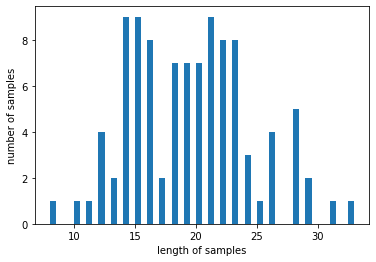

In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in sentence2vec_list], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(map(len, sentence2vec_list))
sequences = pad_sequences(sequence_list, maxlen=max_len, padding='pre')

In [ ]:
sequences[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 30],
      dtype=int32)

In [ ]:
np.random.shuffle(sequences)
split_num = int(len(sequences) * 0.8)

X = sequences[:split_num,:-1]
y = sequences[:split_num,-1]

X_text = sequences[split_num:,:-1]
y_test = sequences[split_num:,-1]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GRU
from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping() 
# 조기종료 : epoch를 길게 돌리지 않고, 이전 epoch보다 accuracy가 낮을 경우 종료

model = Sequential()
model.add(Embedding(5000, 300, input_length=max_len-1,mask_zero=True)) 
# 레이블을 분리하였으므로 이제 X의 길이는 max_len-1
model.add(GRU(128))
model.add(Dense(5000, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# sparse_categorical_crossentropy
# categorical_crossentropy와 다른점은 정답 integer값을 원-핫벡터로 만들어주지 않아도 된다는점

model.summary()

# hist = model.fit(X, y,validation_split=0.1,shuffle=True, epochs=100, batch_size=30, verbose=1, callbacks=[early_stopping])
hist = model.fit(X, y,validation_split=0.1,shuffle=True, epochs=100, batch_size=30, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 300)           1500000   
                                                                 
 gru_1 (GRU)                 (None, 128)               165120    
                                                                 
 dense_1 (Dense)             (None, 5000)              645000    
                                                                 
Total params: 2,310,120
Trainable params: 2,310,120
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================] - 10s 139ms/step - loss: 6.2834 - accuracy: 0.2131 - val_loss: 3.8209 - val_accuracy: 0.1613
Epoch 2/100
47/47 [==============================] - 5s 115ms/step - loss: 3.6834 - accuracy: 0.1872 - val_loss: 3.6389 - val_accuracy: 0.1742
Epoch 3/100
47/47 [==

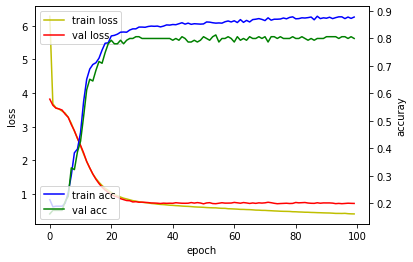

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [ ]:
loss_and_metrics = model.evaluate(X_text, y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

13/13 [==============================] - 0s 23ms/step - loss: 1.0407 - accuracy: 0.7835

loss : 1.0407164096832275
accuray : 0.7835051417350769


In [ ]:
current_word = '사람과'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''
n = 35
for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'사람과 차, 오토바이, 자전거가 있습니다'